# Import libraries

In [1]:
import random
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import itertools 
%matplotlib inline
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)

# Test data and parameters

In [2]:
locations = {'A': (1, 2), 'B': (2, 0), 'C': (2, 3), 'D': (-1, 2), 'E': (-4, 0),
'F': (-5, -3), 'G': (-5, 2), 'H': (4, -3), 'I': (0, -4), 'J': (3, -4)}
mutation_rate = 0.015
random.seed(100)

# Utility functions

In [3]:
def distance(a, b):
    return math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)
def plot_locations():
    plt.figure()
    xs = []
    ys = []
    for (key, value) in locations.items():
        xs.append(value[0])
        ys.append(value[1])
    plt.scatter(xs, ys)
    for (key, value) in locations.items():
        plt.annotate(key, (value[0], value[1]), size=14)
class Population:
    def __init__(self, population_size, gene_length):
        assert population_size > 0
        assert gene_length > 0
        self.individuals = []
        self.population_size = population_size
        self.gene_length = gene_length
        for _ in range(self.population_size):
            self.individuals.append(Individual(self.gene_length))
    def get_individual(self, index):
        assert 0 <= index < self.population_size
        return self.individuals[index]
    def set_individual(self, index, sequence):
        assert 0 <= index < self.population_size
        self.individuals[index] = Individual(self.gene_length, sequence)
    def print_population(self):
        for i in range(self.population_size):
            print(self.individuals[i])
        print()
    def sort_by_fitness(self):
        self.individuals.sort(key = lambda x: x.fitness)
class Individual:
    def __init__(self, gene_length, sequence = []):
        self.gene_length = gene_length
        if sequence:
            self.genes = sequence[:]
        else:
            self.genes = [chr(gene) for gene in list(range(ord('A'), ord('A') + gene_length))]
            random.shuffle(self.genes)
        self.calc_fitness()
    def __repr__(self):
        route = ""
        for gene in self.genes:
            #print(locations[self.genes[i]])
            route += gene
            route += " --> "
        route = route[:-5]
        route += " " + str(self.fitness)
        return route
    def get_gene(self, index):
        assert 0 <= index < self.gene_length
        return self.genes[index]
    def set_gene(self, index, value):
        assert 0 <= index < self.gene_length
        self.genes[index] = value
        self.calc_fitness()
    def calc_fitness(self):
        fitness = 0.0
        cur = (0, 0)
        for gene in self.genes:
            fitness += distance(cur, locations[gene])
            cur = locations[gene]
        fitness += distance(cur, (0, 0))
        self.fitness = fitness
    def plot_gene(self):
        plt.figure()
        all_data = []
        for gene in self.genes:
            all_data.append([locations[gene][0], locations[gene][1]])
        plt.plot(*zip(*itertools.chain.from_iterable([[all_data[i], all_data[i + 1]] for i in range(len(all_data) - 1)])),color = 'brown', marker = 'o')
        for (key, value) in locations.items():
            plt.annotate(key, (value[0], value[1]))
def mutate(indiv):
    for i in range(indiv.gene_length):
        if (random.random() < mutation_rate):
            random_pos = random.randint(0, indiv.gene_length - 1)
            temp = indiv.get_gene(i)
            indiv.set_gene(i, indiv.get_gene(random_pos))
            indiv.set_gene(random_pos, temp)
    indiv.calc_fitness()
def crossover(indiv1, indiv2):
    child = Individual(indiv1.gene_length)
    start_pos = random.randint(0, indiv1.gene_length - 1)
    end_pos = random.randint(0, indiv1.gene_length - 1)
    start_pos, end_pos = min(start_pos, end_pos), max(start_pos, end_pos)

    selected = [indiv1.get_gene(i) for i in range(start_pos, end_pos + 1)]
    indiv2_pos = 0
    for i in range(child.gene_length):
        if i < start_pos or i > end_pos:
            while indiv2.get_gene(indiv2_pos) in selected:
                indiv2_pos += 1
            child.set_gene(i, indiv2.get_gene(indiv2_pos))
            indiv2_pos += 1
        else:
            child.set_gene(i, indiv1.get_gene(i))
    child.calc_fitness()
    return child
def evolve(p):
    new_p = Population(p.population_size, p.gene_length)
    new_p.set_individual(0, p.get_individual(0).genes)
    for i in range(1, new_p.population_size):
        indiv1 = new_p.get_individual(random.randint(0, new_p.population_size - 1))
        indiv2 = new_p.get_individual(random.randint(0, new_p.population_size - 1))
        child = crossover(indiv1, indiv2)
        mutate(child)
        new_p.set_individual(i, child.genes)
    return new_p

# Driver function

C --> I --> A --> H --> J --> B --> G --> E --> D --> F 53.692500052401236
H --> G --> E --> A --> C --> D --> F --> J --> B --> I 54.553977714511404
J --> A --> B --> C --> E --> I --> H --> D --> G --> F 54.950806812156735
F --> I --> H --> G --> J --> D --> E --> A --> C --> B 57.964739370942304
A --> B --> I --> G --> C --> H --> F --> E --> D --> J 58.129076204668394
E --> J --> C --> B --> I --> F --> G --> H --> D --> A 58.30724695910865
E --> F --> B --> D --> C --> J --> I --> A --> G --> H 58.995340184815355
E --> A --> F --> J --> D --> B --> G --> I --> H --> C 65.21789784433726



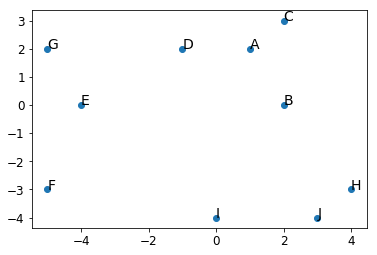

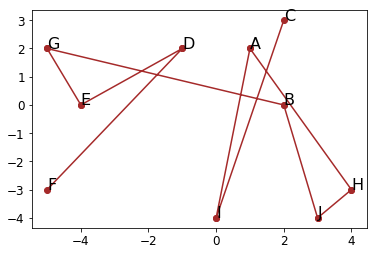

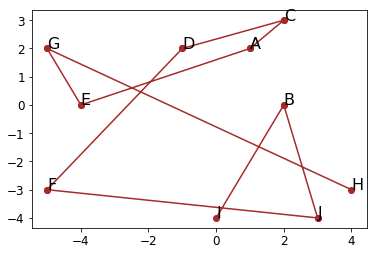

In [4]:
plot_locations()
p = Population(8, 10)
p.sort_by_fitness()
p.print_population()
p.individuals[0].plot_gene()
p.individuals[1].plot_gene()

C --> I --> A --> H --> J --> B --> G --> E --> D --> F 53.692500052401236
H --> G --> E --> A --> C --> D --> F --> J --> B --> I 54.553977714511404
J --> A --> B --> C --> E --> I --> H --> D --> G --> F 54.950806812156735
F --> I --> H --> G --> J --> D --> E --> A --> C --> B 57.964739370942304
A --> B --> I --> G --> C --> H --> F --> E --> D --> J 58.129076204668394
E --> J --> C --> B --> I --> F --> G --> H --> D --> A 58.30724695910865
E --> F --> B --> D --> C --> J --> I --> A --> G --> H 58.995340184815355
E --> A --> F --> J --> D --> B --> G --> I --> H --> C 65.21789784433726

10th generation
B --> D --> E --> G --> F --> C --> A --> H --> J --> I 41.32609400531214
F --> E --> J --> H --> I --> B --> G --> C --> A --> D 47.066401687321445
E --> J --> H --> I --> D --> G --> F --> A --> B --> C 49.334208395457956
F --> E --> J --> H --> I --> A --> B --> G --> C --> D 50.66116033791516
B --> E --> J --> H --> D --> G --> F --> C --> A --> I 54.26405967250131
D --> E --> F

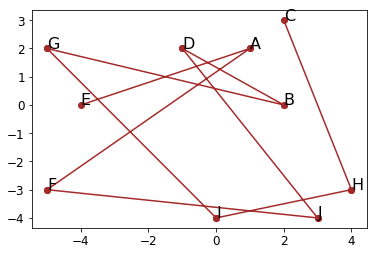

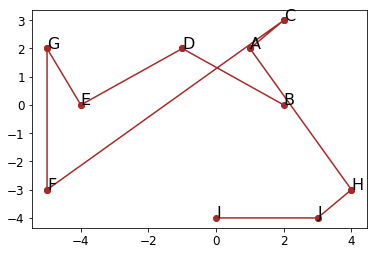

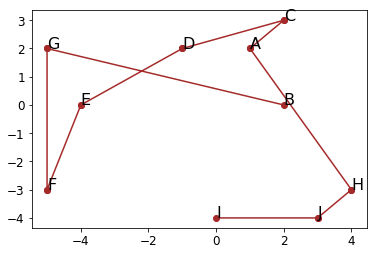

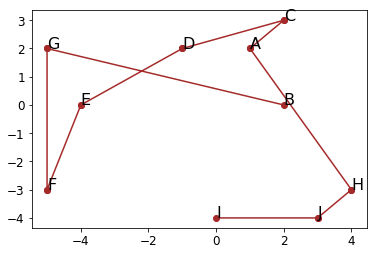

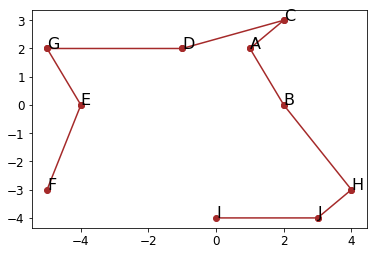

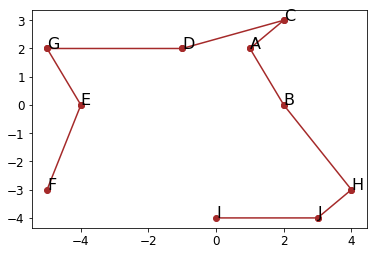

In [5]:
random.seed(100)
p = Population(8, 10)
p.sort_by_fitness()
p.print_population()
p.individuals[-1].plot_gene()
#i = 3
#j = 1
#i1 = p.individuals[i]
#i2 = p.individuals[j]
#i1.plot_gene()
#i2.plot_gene()
#child = crossover(i1, i2)
#child.plot_gene()
#print(i1)
#print(i2)
#print(child)
best_individuals = []
for i in range(51):
    p1 = evolve(p)
    p1.sort_by_fitness()
    p = p1
    best_individuals.append(p.individuals[0])
    if i % 10 == 0 and i > 0:
        print(str(i) + "th generation")
        p.print_population()
        p.individuals[0].plot_gene()
#mutate(p.get_individual(0))
#p.print_population()

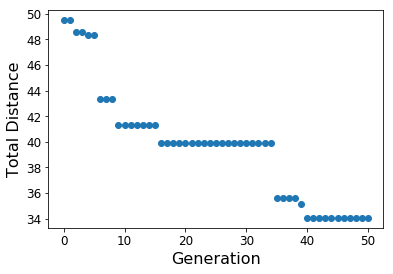

In [7]:
plt.figure()
xs = []
ys = []
for i in range(len(best_individuals)):
    xs.append(i)
    ys.append(best_individuals[i].fitness)
plt.scatter(xs, ys)
plt.xlabel('Generation')
plt.ylabel('Total Distance')